In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel(
    "/home/user/Documents/LINEAR REGRESSION/Task_students_performance_dataset.xlsx"
)

df.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [4]:
df.select_dtypes(include='object').columns


Index(['Student_ID', 'Gender', 'Parental_Education', 'Internet_Access',
       'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular',
       'School_Type', 'Teacher_Feedback'],
      dtype='object')

In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,...,Parental_Education_High School,Parental_Education_Postgraduate,Internet_Access_Yes,Tutoring_Classes_Yes,Sports_Activity_Yes,Extra_Curricular_Yes,School_Type_Public,Teacher_Feedback_Excellent,Teacher_Feedback_Good,Teacher_Feedback_Poor
0,36.330635,86.628815,38.182863,32727.500387,6.777112,2.488956,4.526416,1.698767,9.416549,4,...,False,True,False,False,True,False,False,False,True,False
1,9.582476,73.504255,95.788249,42332.567312,6.631231,2.192993,5.920305,8.459841,4.382245,4,...,True,False,False,False,True,False,False,True,False,False
2,5.795795,65.453321,73.939564,44142.273093,5.311059,0.887486,5.788195,4.140011,7.373097,5,...,True,False,True,False,False,True,False,True,False,False
3,19.578110,94.381263,53.443393,64498.434188,6.380781,1.267095,6.313880,5.694395,5.281190,6,...,False,False,True,False,False,True,False,False,True,False
4,39.426018,46.671849,39.749045,42105.884774,4.266327,0.397970,1.551979,8.150371,7.069597,6,...,False,True,False,False,False,True,False,False,False,True


In [6]:
df.isnull().sum()


Study_Hours_per_Week          0
Attendance_Percentage         0
Previous_Sem_Score            0
Family_Income                 0
Sleep_Hours                   0
                             ..
Extra_Curricular_Yes          0
School_Type_Public            0
Teacher_Feedback_Excellent    0
Teacher_Feedback_Good         0
Teacher_Feedback_Poor         0
Length: 321, dtype: int64

In [7]:
df = df.dropna()


In [8]:
X = df.drop('Final_Score', axis=1)
y = df['Final_Score']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


In [ ]:
model = Ridge(alpha=1.0)
model.fit(X_train_poly, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [ ]:
y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.30014621346801773


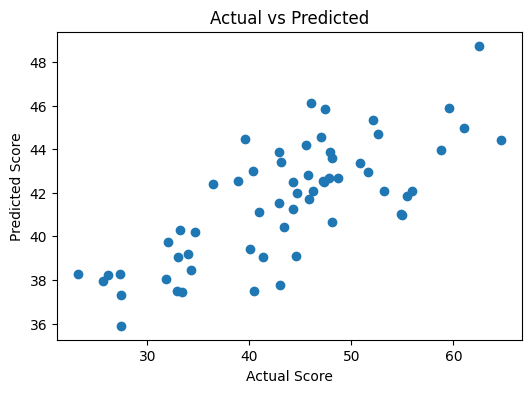

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
df.corr()['Final_Score'].sort_values(ascending=False)

Final_Score              1.000000
Previous_Sem_Score       0.632940
Study_Hours_per_Week     0.464599
Attendance_Percentage    0.335473
Student_ID_S1262         0.149851
                           ...   
Student_ID_S1040        -0.116227
Student_ID_S1161        -0.121732
Student_ID_S1184        -0.123724
Student_ID_S1149        -0.126971
Student_ID_S1280        -0.136492
Name: Final_Score, Length: 321, dtype: float64